# Kmeans

## Import the libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Read the dataset

In [2]:
dd = pd.read_csv('driver-data.csv')
dd.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


## Select only required Columns

In [3]:
new_data = dd.loc[:,['mean_dist_day','mean_over_speed_perc']]
new_data.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


## Fit the data

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3,random_state = 42)
kmeans.fit(new_data)

KMeans(n_clusters=3, random_state=42)

## Visualize the clusters

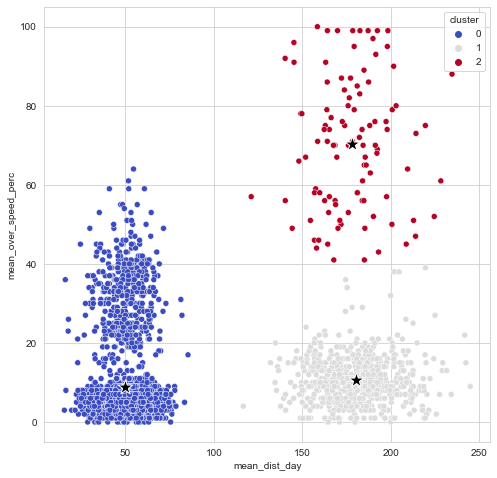

In [5]:
plt.figure(figsize = (8,8))
new_data['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.scatterplot(x = 'mean_dist_day', y = 'mean_over_speed_perc',data=new_data, hue='cluster',palette='coolwarm')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 250,c = 'black',marker = '*',edgecolor = 'white',label = 'centroids')
plt.show()

## Check for optimum number of clusters

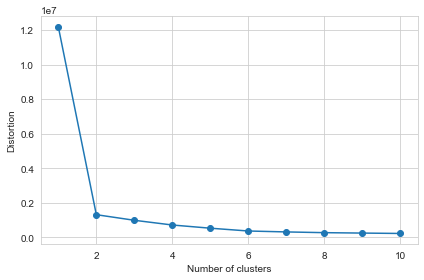

In [6]:
distortion = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,random_state = 42)
    kmeans.fit(new_data)
    distortion.append(kmeans.inertia_)
plt.plot(range(1,11),distortion,marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [7]:
# As we can see after the value 2 there is not much change in SSE

## Train the model with new k value

In [8]:
kmeans2 = KMeans(n_clusters = 2,random_state = 42)
kmeans2.fit(new_data)

KMeans(n_clusters=2, random_state=42)

In [9]:
# Visualize

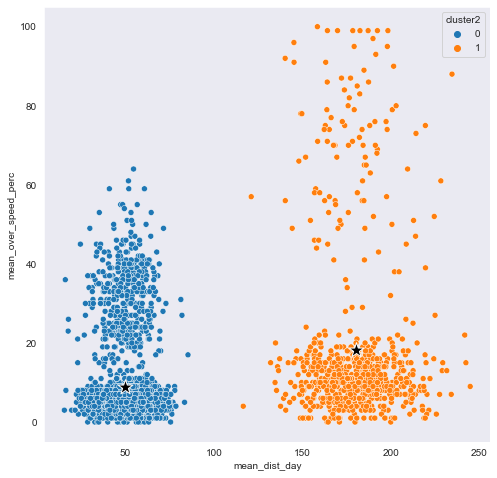

In [10]:
plt.figure(figsize = (8,8))
new_data['cluster2'] = kmeans2.labels_
sns.set_style('dark')
sns.scatterplot(x = 'mean_dist_day', y = 'mean_over_speed_perc',data=new_data, hue='cluster2')
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],s = 250,c = 'black',marker = '*',edgecolor = 'white',label = 'centroids')
plt.show()